# Autoencoder Implementation

In [25]:
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape, Conv2D, Conv2DTranspose, MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.metrics import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import numpy as np
from matplotlib import pyplot as plt

# Load the mnist dataset

In [26]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Visualize an image from the dataset

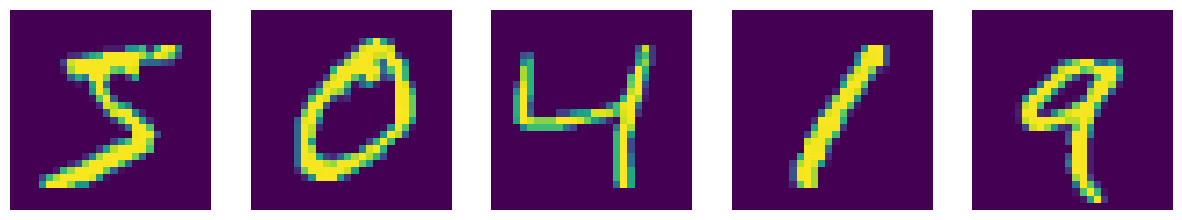

In [28]:
fig, axes = plt.subplots(1, 5,figsize=(15, 3))
for i in range(0, 5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')

# Normalize the dataset to the range of 0-1

In [29]:
x_train = x_train / 255.0

x_test = x_test / 255.0

type(x_train)

numpy.ndarray

# Encoder layers

In [30]:
encoder = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(units=100, activation='relu'),
    Dense(units=20, activation='relu')
])

encoder.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         2,020 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,520 (314.53 KB)

 Trainable params: 80,520 (314.53 KB)

 Non-trainable params: 0 (0.00 B)

# Decoder Layers

In [31]:
decoder = Sequential([
    Dense(units=100, activation='relu', input_shape=[20]),
    Dense(units=(28*28), activation='sigmoid'),
    Reshape([28, 28])
])

decoder.summary()

/home/steve/deep-learning-env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │        79,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,284 (317.52 KB)

 Trainable params: 81,284 (317.52 KB)

 Non-trainable params: 0 (0.00 B)

# Combine the auto encoder

In [32]:
model = Sequential([encoder, decoder])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (None, 20)             │        80,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (None, 28, 28)         │        81,284 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,804 (632.05 KB)

 Trainable params: 161,804 (632.05 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
history = model.fit(epochs=15, batch_size=5, x=x_train, y=x_train, validation_data=(x_test, x_test))

2025-10-07 10:51:59.698411: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/15


2025-10-07 10:52:00.500312: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


11984/12000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1564

2025-10-07 10:52:40.398716: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


12000/12000 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.1277 - val_loss: 0.1079
Epoch 2/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.1066 - val_loss: 0.1025
Epoch 3/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.1023 - val_loss: 0.1003
Epoch 4/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.1003 - val_loss: 0.0992
Epoch 5/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.0990 - val_loss: 0.0977
Epoch 6/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0981 - val_loss: 0.0965
Epoch 7/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0975 - val_loss: 0.0959
Epoch 8/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0969 - val_loss: 0.0963
Epoch 9/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - loss: 0.0965 - val_loss: 0.0959
Epoch 10/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0962 - val_loss: 0.0955
Epoch 11/15
12000/12000 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - loss: 0.0959 - val_loss: 0.0961
Epoch 12

In [16]:
model.evaluate(x_test, x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0947


0.09467615187168121

In [17]:
x_pred = model(x_test)

In [28]:
x_pred = x_pred * 255.0

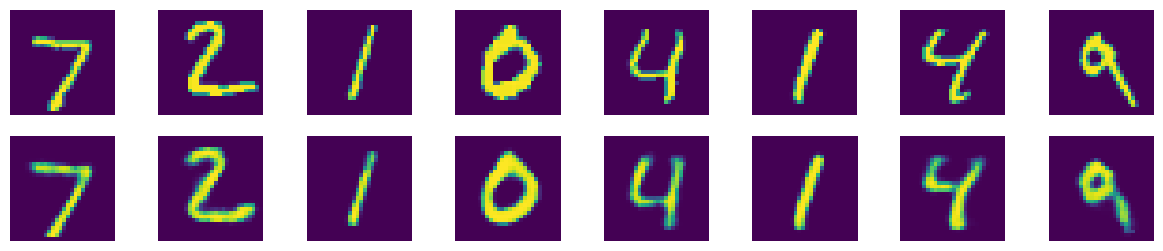

In [31]:
fig,axes = plt.subplots(2, 8,figsize=(15, 3))

for i in range(8):
    axes[0][i].imshow(x_test[i])
    axes[0][i].axis('off')
    axes[1][i].axis('off')
    axes[1][i].imshow(x_pred[i])
    

# Working on a convolutional Auto encoder

In [33]:
conv_encoder = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(activation='relu', filters=60, kernel_size=(3, 3), padding='same'),
    MaxPool2D(pool_size=2),
    Conv2D(activation='relu', filters=120, kernel_size=(3, 3), padding='same'),
    MaxPool2D(pool_size=2),
    Conv2D(activation='relu', filters=180, kernel_size=(3, 3), padding='same'),
    MaxPool2D(pool_size=2)
])

conv_encoder.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 60)     │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 120)    │        64,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 180)      │       194,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 180)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,100 (1016.02 KB)

 Trainable params: 260,100 (1016.02 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
conv_decoder = Sequential([
    Conv2DTranspose(activation='relu', kernel_size=(3, 3), padding='valid', input_shape=[3, 3, 180], filters=120, strides=2),
    Conv2DTranspose(activation='relu', kernel_size=(3, 3), padding='same', filters=60, strides=2),
    Conv2DTranspose(activation='sigmoid', kernel_size=(3, 3), padding='same', filters=1, strides=2),
    Reshape([28, 28])
])

conv_decoder.summary()

/home/steve/deep-learning-env/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose_6              │ (None, 7, 7, 120)      │       194,520 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 14, 14, 60)     │        64,860 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 28, 28, 1)      │           541 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,921 (1015.32 KB)

 Trainable params: 259,921 (1015.32 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model = Sequential([conv_encoder, conv_decoder])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 3, 3, 180)      │       260,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (None, 28, 28)         │       259,921 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,021 (1.98 MB)

 Trainable params: 520,021 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [38]:
model.fit(x_train, x_train, epochs=20)

Epoch 1/20


ValueError: Dimensions must be equal, but are 28 and 32 for '{{node Equal_1}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](data_1, Cast_2)' with input shapes: [32,28,28,1], [32,28].